# Analysis of hypotheses to increase online store revenue

# Table of Contents 

* [Introduction](#num1)
* [Data description](#num2)
* [1. Data loading and hypothesis prioritization](#num3)
* [2. A/B test analysis](#num4)
* [3. General conclusions](#num5)

<a id="num1"></a>
## Introduction

**Task** is to analyze the results of the A/B test.

**Necessary:**
1. Prioritize the hypotheses;
2. Run the A/B test;
3. Analyze the results.

<a id="num2"></a>
## Data description

**1. File `hypothesis.csv`:** 

`Hypothesis` - a brief description of the hypothesis;

`Reach` - reach of users on a 10-point scale;

`Impact` - impact on users on a 10-point scale;

`Confidence` - confidence in the hypothesis on a 10-point scale;

`Efforts` - expenditure of resources to test the hypothesis on a 10-point scale. The greater the `Efforts` value, the more expensive the hypothesis testing.

**2. File `orders.csv`:**

`transactionId` - order identifier;

`visitorId` - identifier of the user who made the order;

`date` - date when the order was made;

`revenue` - revenue of the order;

`group` - A/B-test group the order fell into.

**3. File `visitors.csv`:**

`date` - date;

`group` - A/B-test group;

`visitors` - number of users on the specified date in the specified A/B-test group

<a id="num3"></a>
## 1. Data loading and hypothesis prioritization

In [1]:
# Importing necessary modules.
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# Read hypothesis data file.
data = pd.read_csv('hypothesis.csv', sep=',')
data.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


**Apply the ICE framework to prioritize the hypotheses. Let's sort them in descending order of priority.**

In [3]:
# Let's apply the ICE framework to prioritize hypotheses.
data['ICE'] = data['Impact']*data['Confidence']/data['Efforts']
# Sort the hypotheses in descending order of priority.
pd.set_option('max_colwidth', 200)
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Apply the RICE framework to prioritize the hypotheses. Let's sort them in descending order of priority.**

In [4]:
# Let's apply the RICE framework to prioritize hypotheses. 
data['RICE'] = data['Reach']*data['Impact']*data['Confidence']/data['Efforts']
# Let's sort the hypotheses in descending order of priority.
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Let us point out how the prioritization of hypotheses changed when RICE instead of ICE was applied.**

In [5]:
# Let's check the Reach metric - user reach, to see what caused the hypothesis prioritization to change.
data

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


**Conclusion:** the prioritization of hypotheses changed when applying RICE instead of ICE because of the high value of Reach = 10 for hypothesis №7. The other hypotheses have lower value of this parameter. This means that hypothesis №7 affects the most users while hypothesis №8 affects the least users.

**The most prioritized hypotheses are:**

7 - Add a subscription form to all main pages to gather a customer base for email newsletters;
    
2 - Add product recommendation blocks to the website of the online store to increase conversion rate and average order check;

0 - Add two new traffic channels to attract 30% more users.

<a id="num4"></a>
## 2. A/B test analysis

**Examine the data and do the preprocessing.**

In [6]:
# Examine order data.
orders = pd.read_csv('orders.csv', sep=',')

orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# Explore visitor data.
visitors = pd.read_csv('visitors.csv', sep=',')

visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# Check for gaps in the orders dataframe.
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
# Check for gaps in the visitors dataframe.
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [12]:
# Check for duplicates in the orders dataframe.
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


In [13]:
# Check for duplicates in the visitors dataframe.
visitors[visitors.duplicated()]

,date,group,visitors


In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Perform a check to see if any users fall into both groups - by table with orders.**

In [15]:
a = orders['visitorId'][orders['group']=='A'].unique()
b = orders['visitorId'][orders['group']=='B'].unique()

In [16]:
len(np.intersect1d(a,b))

58

In [17]:
len(b)

586

**Conclusion:** There are 58 users in the data that fall into both groups. This is almost 10% of all unique users, which is quite a lot. It is a good idea to remove these users to avoid bias in the data when analyzing.

In [18]:
# Create an array of unique date and test group value pairs.
datesGroups = orders[['date','group']].drop_duplicates()

# Collect cumulative daily aggregated order data.
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                     orders['group'] == x['group'])].
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : 'nunique', 
                                          'visitorId' : 'nunique', 
                                          'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

In [19]:
# Let's collect cumulative day-by-day aggregated visitor data.
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                       visitors['group'] == x['group'])].
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

In [20]:
# Merge tables into one.
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


**Let's check if the cumulativeData dataframe was created correctly. Whether the minimum and maximum dates in this dataframe coincide with the minimum and maximum dates in the source data.**

In [21]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

In [22]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [23]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

**Conclusion:** the data matches. 

**1. Let's plot the cumulative revenue by group.**

In [25]:
# Dataframe with cumulative number of orders and cumulative revenue by day in group A.
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# Dataframe with cumulative number of orders and cumulative revenue by day in group B.
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

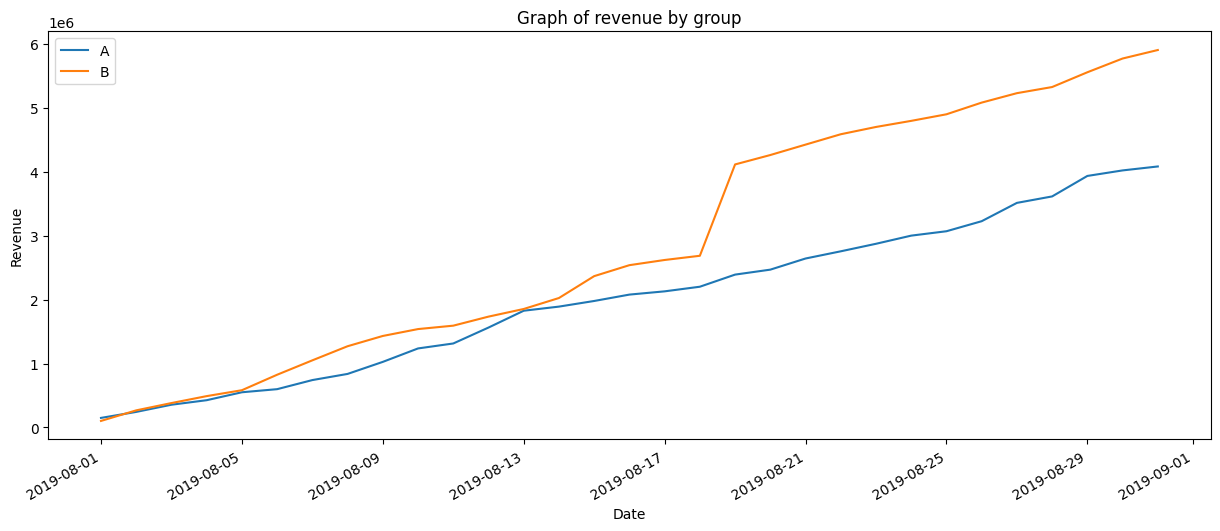

In [26]:
fig = plt.figure(figsize=(15,6))

# Plot the revenue of group A.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plot group B revenue.
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title("Graph of revenue by group")
fig.autofmt_xdate()
plt.legend() 
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

**Conclusion:** Revenue increases evenly, but there is a noticeable sharp rise from 18th to 19th in group B. This could be due to the large number of orders or due to very expensive orders during this period.

**2. Let's plot the cumulative average check by group.**

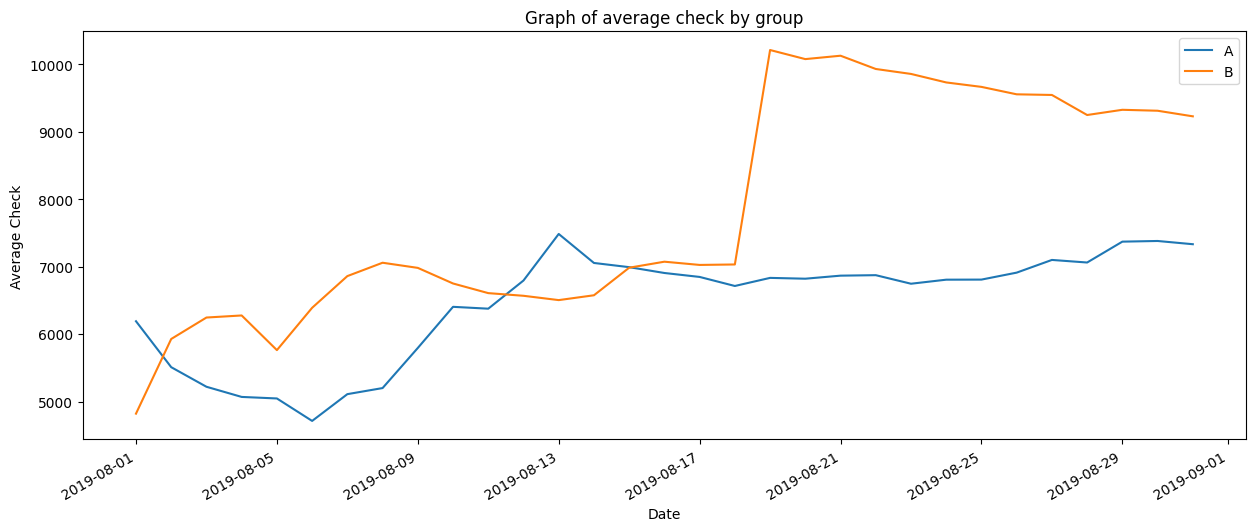

In [27]:
fig = plt.figure(figsize=(15,6))

# Plot the average check of group A.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Plot the average check of group B.
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title("Graph of average check by group")
plt.legend() 
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Average Check")
plt.show()

**Conclusion:** there was also a sharp increase in the average check in Group B between the 18th and 19th. It is too early to take regressions on this metric and additional analysis is required to analyze the outliers that may be skewing the results.

**3. Let's plot the relative change in the cumulative average check of group B to group A.**

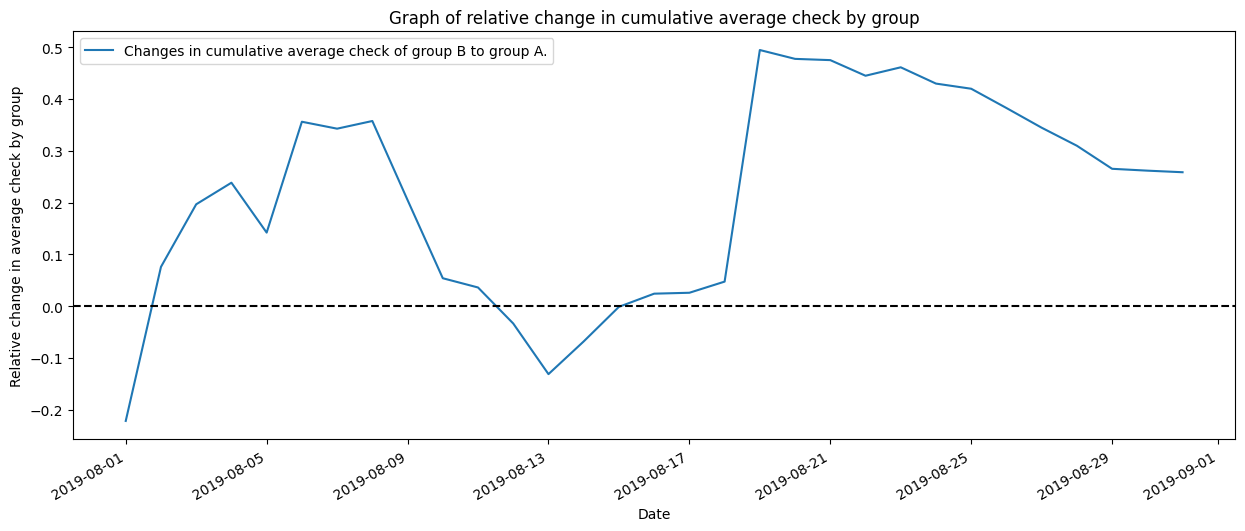

In [28]:
fig = plt.figure(figsize=(15,6))

# Collect data in a single dataframe.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plot the ratio of average checks.
plt.rcParams['figure.figsize'] = [15, 7]
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Changes in cumulative average check of group B to group A.")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Graph of relative change in cumulative average check by group")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Relative change in average check by group")
plt.show()

**Conclusion:** as you can see on the graph, the test results changed dramatically on several dates. Most likely, these are the dates when abnormal orders were made.

**4. Let's plot the cumulative average number of orders per visitor by group.**

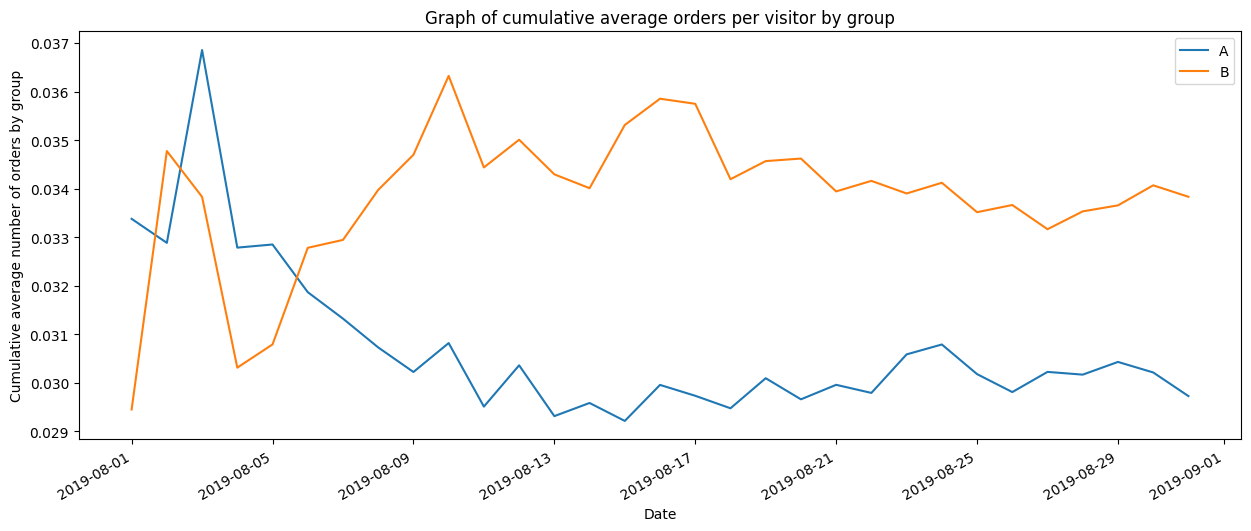

In [29]:
# Calculate cumulative conversion.
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Separate group A data.
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Separate group B data.
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Plot the graphs
fig = plt.figure(figsize=(15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("Graph of cumulative average orders per visitor by group")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Cumulative average number of orders by group")
plt.show()


**Conclusion:** at the beginning of the test group A had a higher cumulative average of orders per visitor, but over time group B leveled off and took values higher than group A. 

**5. plot the relative change in the cumulative average number of orders per visitor from group B to group A.**

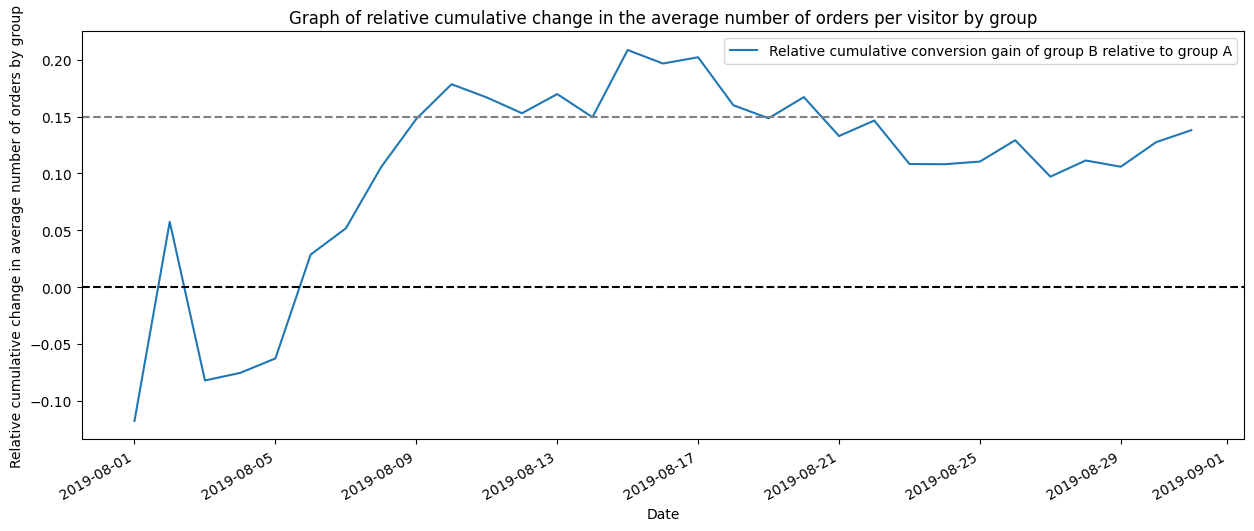

In [30]:
# Collect data in a single dataframe.
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plot the ratio of average orders per visitor.
fig = plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Relative cumulative conversion gain of group B relative to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title("Graph of relative cumulative change in the average number of orders per visitor by group")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Relative cumulative change in average number of orders by group")
plt.show()

**Conclusion:** At the beginning of the test, group B was lower in terms of cumulative change in the average number of orders per visitor, but over time it increased and remained at the same level on average.

**6. Let's build a dot plot of the number of orders by users**

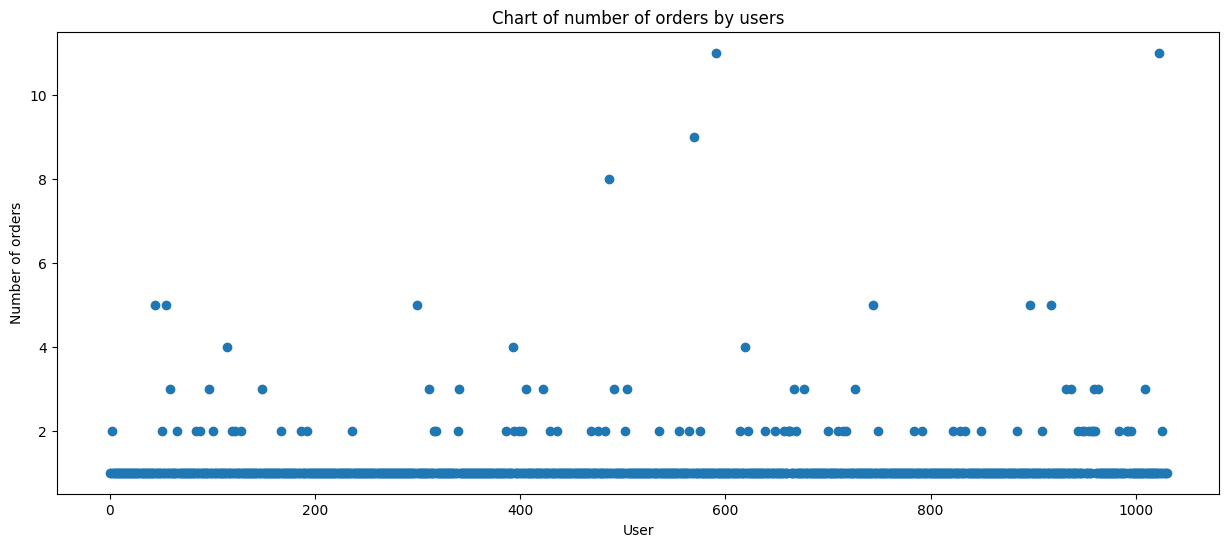

In [31]:
# Count the number of orders by user.
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

# Let's build a dot plot of the number of orders per user.
plt.rcParams['figure.figsize'] = [15, 6]
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Chart of number of orders by users")
plt.xlabel("User")
plt.ylabel("Number of orders")
plt.show()

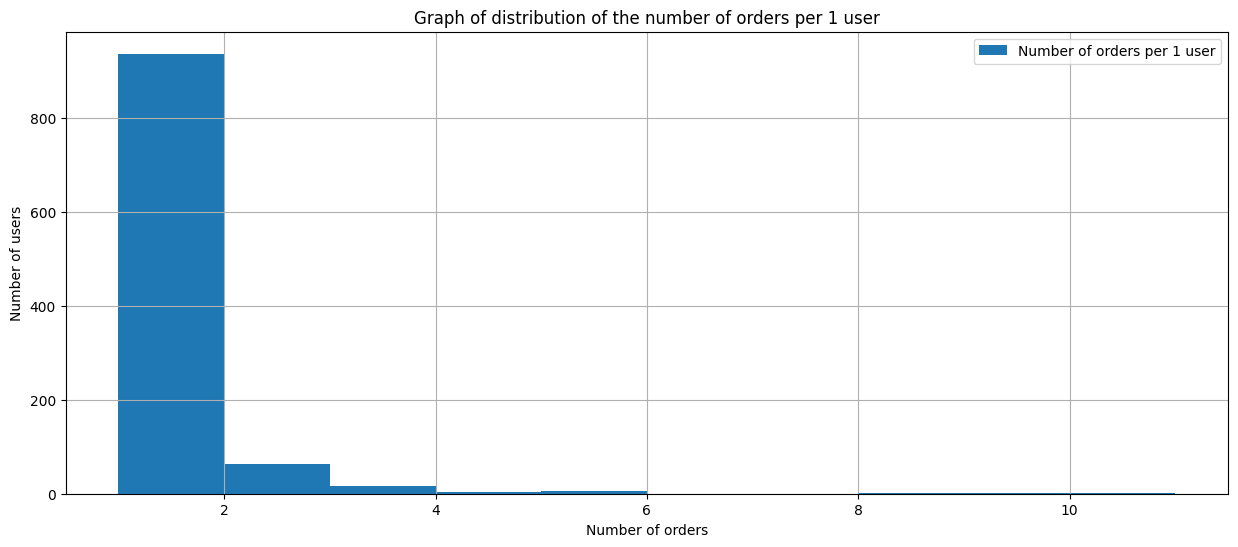

In [32]:
# Let's build a histogram of the distribution of the number of orders per user.
plt.hist(ordersByUsers['orders'], label="Number of orders per 1 user")
plt.rcParams['figure.figsize'] = [15, 7]
plt.title('Graph of distribution of the number of orders per 1 user')
plt.grid(which='major')
plt.legend()
plt.xlabel("Number of orders")
plt.ylabel("Number of users")
plt.show()

**Conclusion:** Mostly customers made 1-2 orders, but there are customers who made more orders.

**7. Let's calculate the 95th and 99th percentiles of the number of orders per user. Let's choose a boundary to define abnormal users.**

In [33]:
np.percentile(ordersByUsers['orders'], [95, 98, 99])

array([2., 3., 4.])

In [34]:
per_orders = np.round(np.percentile(ordersByUsers['orders'], [98])[0])
per_orders

3.0

**Conclusion:** 5% of users made more than 2 orders and 1% of users made more than 4 orders. 

Let's choose the value of 3 orders as the boundary for defining abnormal users.

**8. Let's construct a dot plot of order values.**

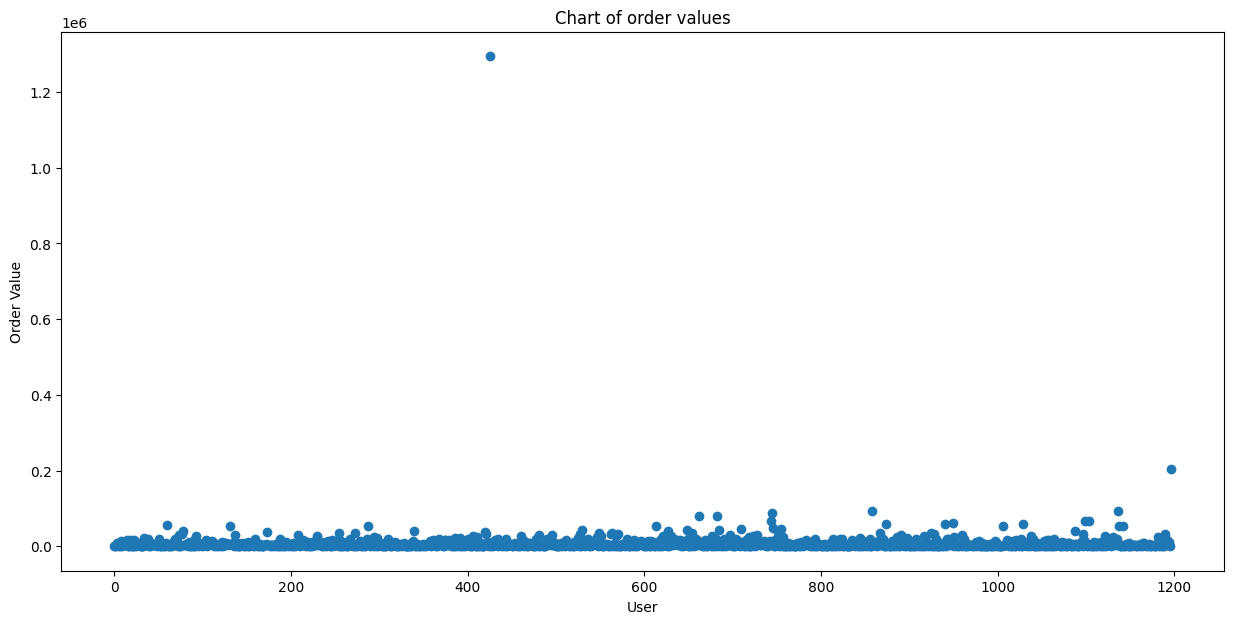

In [35]:
# Build a dot plot of the number of orders per user.
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.rcParams['figure.figsize'] = [15, 7]
plt.scatter(x_values, orders['revenue']) 
plt.title('Chart of order values')
plt.xlabel("User")
plt.ylabel("Order Value")
plt.show()

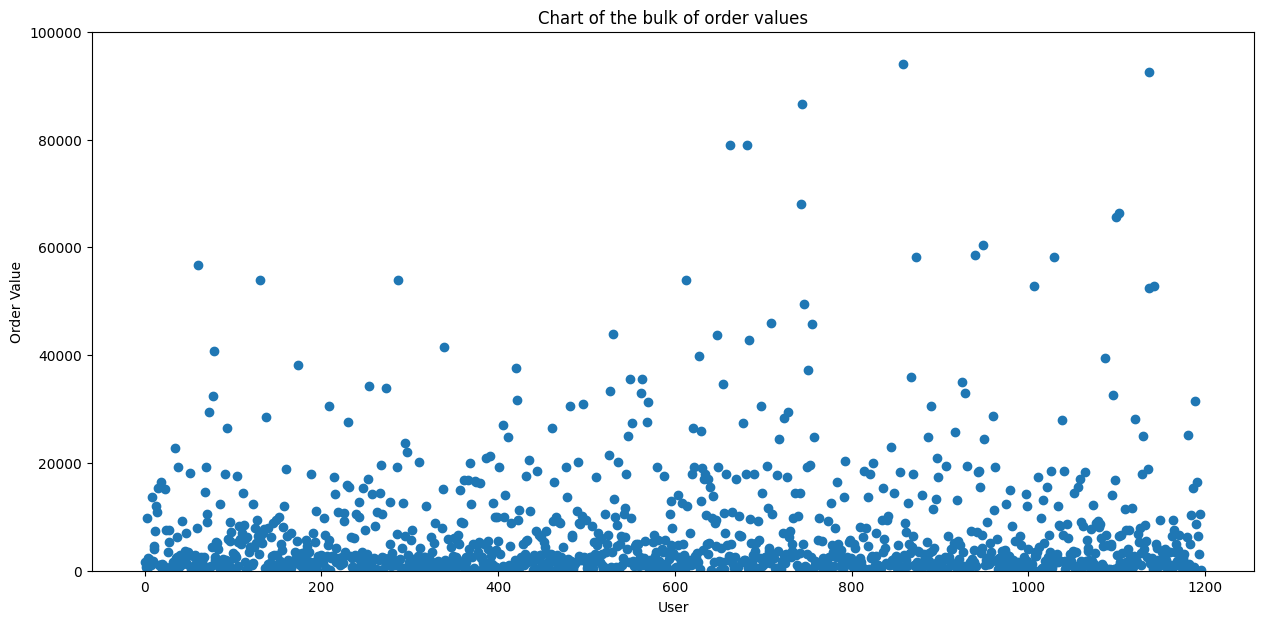

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.rcParams['figure.figsize'] = [15, 7]
plt.scatter(x_values, orders['revenue']) 
plt.title("Chart of the bulk of order values")
plt.xlabel("User")
plt.ylabel("Order Value")
plt.ylim([0, 100000])
plt.show()

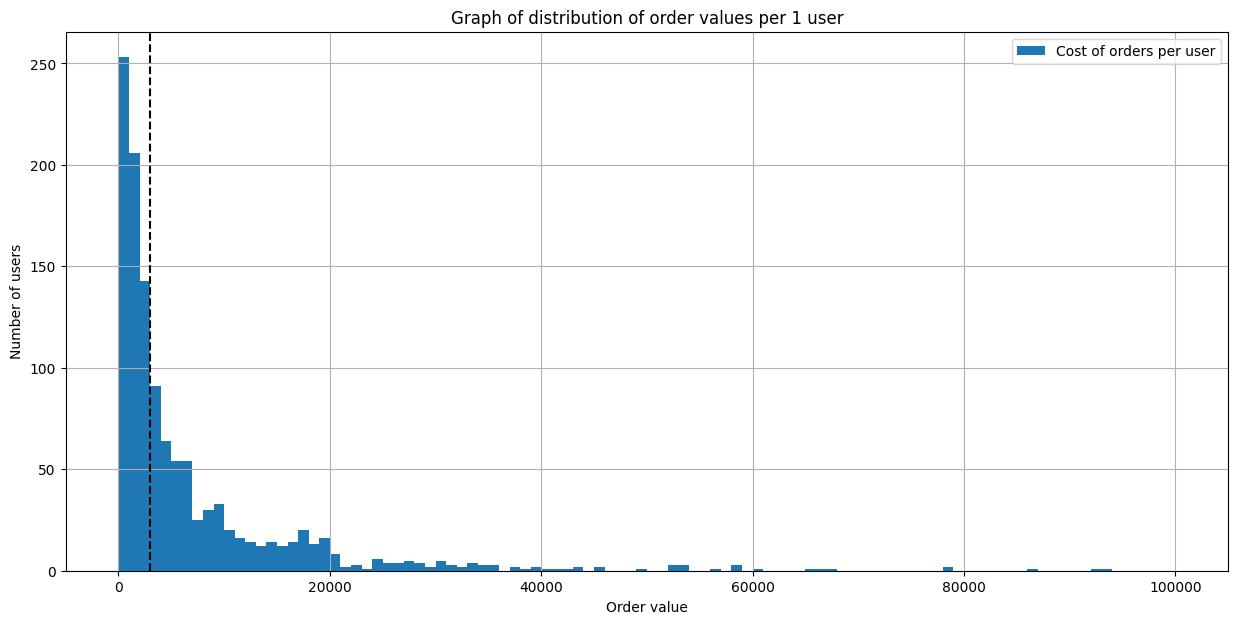

In [37]:
# Let's build a histogram of the distribution of the number of orders per user.
a = orders['revenue'].median()

plt.hist(orders['revenue'], bins = 100, range = (0, 100000), label="Cost of orders per user")
plt.rcParams['figure.figsize'] = [15, 7]
plt.axvline(x=a, color='black', linestyle='--')

plt.title('Graph of distribution of order values per 1 user')
plt.grid(which='major')
plt.legend()
plt.xlabel('Order value')
plt.ylabel("Number of users")
plt.show()

In [38]:
orders['revenue'].median()

2978.0

**Conclusion:** The graphs show that there are orders more expensive than 20,000 USD. Also, there are abnormal orders for 200,000 and 1,200,000 USD.

**9. Let's calculate the 95th and 99th percentiles of order value.**

In [39]:
np.percentile(orders['revenue'], [95, 96, 99])

array([28000. , 31382. , 58233.2])

In [40]:
per_revenue = np.round(np.percentile(orders['revenue'], [96])[0])
per_revenue

31382.0

**Findings:** 5% of customers made orders of more than 28,000 USD and 1% of customers made orders of more than 58,233 USD. 

Let's choose the value of 31 382 as the boundary for identifying abnormal users.

**10. Let's calculate the statistical significance of differences in the average number of orders per visitor between groups using "raw" data.**

**State the hypotheses.**

**Null hypothesis:** There are **no** statistically *significant differences* in the average number of orders between groups on raw data.

**Alternative hypothesis:** There are statistically *significant differences* in the average number of orders between groups on the raw data.

Since our data contain outliers, we use the non-parametric Wilcoxon-Mann-Whitney test. The smaller the value of the criterion, the more likely that the differences between the values of the parameter in the samples are reliable. 

a = 0.05. 

If P-value =< 0.05 the null hypothesis is rejected. 
                   
If P-value > 0.05 the null hypothesis is accepted.

In [41]:
# Create a dataframe with visitors by day in group A.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
# Rename the columns
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Collect cumulative daily data on the number of visitors in group A.
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
# Rename the columns.
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [42]:
# Create a dataframe with visitors by day in group B.
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
# Rename the columns
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Collect cumulative daily data on the number of users in group B.
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
# Rename the columns.
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [43]:
# Collect data on the number of orders, total revenue by day in group A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
# Переименовываем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Collect data on the commulative number of orders, total revenue by day in group A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
# Rename the columns
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [44]:
# Gather data on the number of orders, cumulative revenue by day in group B.
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
# Rename the columns.
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


# Collect data on the commulative number of orders, total revenue by day in group B.
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
# Rename the columns.
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [45]:
# Combine the received data into one dataframe.
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**The table consists of:**

`date` - date;

`ordersPerDateA` - number of orders on the selected date in group A;

`revenuePerDateA` - total revenue on the selected date in group A;

`ordersPerDateB` - number of orders on the selected date in group B;

`revenuePerDateB` - total revenue on the selected date in group B;

`ordersCummulativeA` - total number of orders up to and including the selected date in group A;

`revenueCummulativeA` - total revenue up to and including the selected date in group A;

`ordersCummulativeB` - total number of orders up to and including the selected date in group B;

`revenueCummulativeB` - total revenue up to and including the selected date in group B;

`visitorsPerDateA` - number of users on the selected date in group A;

`visitorsPerDateB` - number of users on the selected date in group B;

`visitorsCummulativeA` - number of users up to and including the selected date in group A;

`visitorsCummulativeB` - number of users up to and including the selected date in group B.

**Create variables ordersByUsersA and ordersByUsersB with columns ['`userId`', '`orders`']. In them, for users who have ordered at least once, we will specify the number of completed orders.**

In [46]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

**Let's declare variables sampleA and sampleB, in which users from different groups will correspond to the number of orders. Those who have not ordered anything will have zeros.**

In [47]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Apply the Mann-Whitney criterion and format the p-value by rounding it.
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Let's derive the relative increase in the average number of orders of group B: group B conversion/group A conversion - 1.
print('Relative increase in the average number of Group B orders:', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.017
Relative increase in the average number of Group B orders: 0.138


**Conclusion:** We reject the null hypothesis.

**11. Let's calculate the statistical significance of differences in average order receipt between groups using "raw" data.**

**Hypotheses formulation.**

**Null hypothesis:** There are **no** statistically *significant differences* in the average order receipt between groups in the raw data.

**Alternative hypothesis:** Statistically *significant differences* in average order receipt between groups on raw data **is**.

а = 0.05

In [48]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))

print('The ratio of the average check of group B to A:', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
The ratio of the average check of group B to A: 0.259


**Conclusion:** we accept the null hypothesis, p-value = 0.729 greater than 0.05 - there are no statistically significant differences in the average check between the groups. The average check of group B is higher than the average check of group A by 25.9%.

**12. Let's calculate the statistical significance of differences in the average number of orders per visitor between groups according to the "cleaned" data.**

**State the hypotheses.**

**Null hypothesis:** There are **no** statistically *significant differences* in the average number of orders per visitor between groups on "cleaned" data.

**Alternative hypothesis:** Statistically *significant differences* in the average number of orders per visitor between groups on "cleaned" data **is**.

а = 0.05

**We create slices of users with orders greater than 3 and users who made orders more expensive than 30,000 c.u.e.**

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > per_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > per_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > per_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

In [50]:
print('Number of abnormal users:', abnormalUsers.shape[0])

Number of abnormal users: 52


**Let's prepare samples of the number of orders by user by test group.**

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Let's apply the Mann-Whitney statistical criterion to the obtained samples.**

In [52]:
print('P-value on "cleaned" data:', 
      '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Relative increase in the average number of Group B orders in the "cleaned" data:', 
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value on "cleaned" data: 0.013
Relative increase in the average number of Group B orders in the "cleaned" data: 0.155


**Conclusion:** there are 52 anomalous users in the data. The results of the cleaned data in terms of average order quantity are almost unchanged. Segment B is better than segment A.

**13. Let's calculate the statistical significance of differences in average order receipt between groups according to "cleaned" data.**

**Hypotheses formulation.**

**Null hypothesis:** There are **no** statistically *significant differences* in average order receipt between groups on "cleaned" data.

**Alternative hypothesis:** Statistically *significant differences* in average order receipt between groups on "cleaned" data **is**.

а = 0.05

In [53]:
print('P-value on the "cleaned" data:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Ratio of the average check of group B to A on "cleaned" data:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value on the "cleaned" data: 0.845
Ratio of the average check of group B to A on "cleaned" data: 0.023


**Conclusion:** P-value increased - no statistically significant differences in the average check between groups. The difference between segments has decreased from 25.9% to 2.3%. So there is less noise in the cleaned data. 

**Conclusions on the A/B test conducted:**

According to the raw data, there are differences in the average number of orders of groups A and B (P-value = 0.017 < 0.05). The relative increase in the average number of orders of group B is 13.8%

According to the raw data, there are no differences in the average check between groups A and B (p-value = 0.729 > 0.05). The average check of group B is 25.9% higher than the average check of group A.

There are 57 anomalous users in the data. The results of the cleaned data for average order quantity and average check are almost unchanged. Segment B is better than segment A.

Based on these facts, the test should be stopped and recognized as a success, because with the available data, segment B is better than segment A.

<a id="num5"></a>
## 3. General conclusions

Mostly buyers made 1-2 orders;

5% of buyers made orders of more than 28,000 c.u;

There is a statistically significant difference in the average number of orders between the groups in both the raw and the data after anomaly filtering;

There is no statistically significant difference in the average check between the groups on either the "raw" or the data after anomaly filtering;

The graph of the difference in average order quantity between groups reports that Group B's results are better than Group A and there are improvement trends of more than 10%;

The graph of the difference in average check difference reports that Group B's results are 20% better;

Based on these facts, the test should be stopped and recognized as a success, because with the available data segment B is better than segment A.